### Example of Gradient Descent optimization for simple linear regression (example adopted from "The Hundred Page Machine Learning Book", by Andriy Burkov).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams.update({'font.size': 18})

Recall linear regression model: $f(x) = wx + b$. We find the values of parameters $w$ and $b$ by minimizing the mean squared error:

\begin{equation*}
l = 1/N \sum_{i=1}^N (y_i - (wx +b))^2
\end{equation*}

For Gradient Descent, we first need to obtain the partial derivatives of this loss function relative each parameter:

\begin{equation*}
\frac{\partial l}{\partial w} = 1/N \sum_{i=1}^N -2x_i(y_i - (wx +b)
\end{equation*}

\begin{equation*}
\frac{\partial l}{\partial b} = 1/N \sum_{i=1}^N -2(y_i - (wx +b)
\end{equation*}

Gradient Descent proceeds in <b>epochs</b>. In each epoch, the entire training set is used to update each parameter. We initialize parameters $w$ and $b$ to 0. In each iteration (epoch), we compute the partial derivatives using the current values of $w$ and $b$. Then, we simultaneously update the parameters $w$ and $b$ using these partial derivatives:

\begin{equation*}
w = w - \alpha \frac{\partial l}{\partial w}
\end{equation*}

\begin{equation*}
b = b - \alpha \frac{\partial l}{\partial b}
\end{equation*}

The $\alpha$ is the learning rate and controls the size of the update. 

#### Example: Let's look at a specific example of simple linear regression using a real data set about ad spending. Here, in $y = wx + b$, $y$ = Sales (unit product sales) and $x$ = Spending (in millions of dollars). We want to find the optimal values of $w$ and $b$ using Gradient Descent.

In [2]:
salesDF = pd.read_csv("http://facweb.cs.depaul.edu/mobasher/classes/csc478/data/data.csv")
salesDF.head(10)

,Spending,Sales
0,37.8,22.1
1,39.3,10.4
2,45.9,9.3
3,41.3,18.5
4,10.8,12.9
5,48.9,7.2
6,32.8,11.8
7,19.6,13.2
8,2.1,4.8
9,2.6,10.6


In [3]:
salesDF.shape

(200, 2)

In [4]:
def plot_original_data(salesDF):
    x = salesDF['Spending']
    y = salesDF['Sales']

    plt.scatter(x, y, color='#1f77b4', marker='o')

    plt.xlabel("Spendings, M$")
    plt.ylabel("Sales, Units")
    plt.title("Sales as a function of radio ad spendings.")
    plt.show()
    # fig1 = plt.gcf()
    # fig1.subplots_adjust(top = 0.98, bottom = 0.1, right = 0.98, left = 0.08, hspace = 0, wspace = 0)
    # fig1.savefig('Illustrations/gradient_descent-1.pdf', format='pdf', dpi=1000, bbox_inches = 'tight', pad_inches = 0)
    # fig1.savefig('Illustrations/gradient_descent-1.png', dpi=1000, bbox_inches = 'tight', pad_inches = 0)

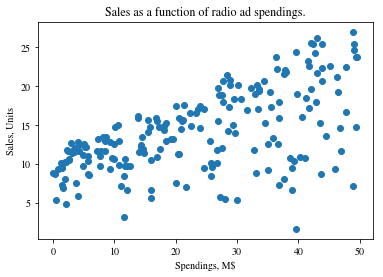

In [5]:
plot_original_data(salesDF)

#### Let's first create a function that updates the values of $w$ and $b$ using the partial derivatives during one epoch (one pass through the training data). 

In [6]:
def update_w_and_b(spendings, sales, w, b, alpha):
    dr_dw = 0.0
    dr_db = 0.0
    N = len(spendings)

    for i in range(N):
        dr_dw += -2 * spendings[i] * (sales[i] - (w * spendings[i] + b))
        dr_db += -2 * (sales[i] - (w * spendings[i] + b))

    # update w and b
    w = w - (dr_dw/float(N)) * alpha
    b = b - (dr_db/float(N)) * alpha

    return w, b

#### The loss function below simply retuns the mean square error on the training data based on the current values of $w$ and $b$. This function will be called in each epoch after parameter are updated so that we can monitor the progress of the gradient descent algorithm.

In [7]:
def loss(spendings, sales, w, b):
    N = len(spendings)
    total_error = 0.0
    for i in range(N):
        total_error += (sales[i] - (w*spendings[i] + b))**2
    return total_error / N

#### Finally, let's create a function for training the model using gradient descent. As noted above, the function iterates over many "epochs" in each of which the full training data is used to update the parameters. The output shows the incremental progress towards the final values of $w$ and $b$.

In [8]:
def train(x, y, w, b, alpha, epochs):
    
    for e in range(epochs):
        w, b = update_w_and_b(x, y, w, b, alpha)

        # log the progress
        if e % 500 == 0:
            print("epoch: ", str(e), "loss: "+str(loss(x, y, w, b)))
            print("w, b: ", w, b)
            print("\n")

    return w, b

#### Now let's run gradient descent on our problem using 15,000 epochs (15,000 passes through the training data) and a learning rate of 0.001. Our initial values for $w$ and $b$ can be set randomly or set to zeros.

In [9]:
# x, y = np.loadtxt("Data/data.csv", delimiter= ",", skiprows=1, unpack = True)
x = salesDF['Spending']
y = salesDF['Sales']

w, b = train(x, y, 0.0, 0.0, 0.001, 15000)


epoch:  0 loss: 92.32078294903626
w, b:  0.7412639000000002 0.028045000000000007


epoch:  500 loss: 32.08199378050947
w, b:  0.415626455768423 2.3466773458203547


epoch:  1000 loss: 25.9534763777287
w, b:  0.36226181143284086 4.09059645918018


epoch:  1500 loss: 22.509720240476202
w, b:  0.3222588537719927 5.397865032301008


epoch:  2000 loss: 20.57459375662496
w, b:  0.2922720218247468 6.3778136487118635


epoch:  2500 loss: 19.487201281880758
w, b:  0.2697934316700887 7.112398194344303


epoch:  3000 loss: 18.876170218021276
w, b:  0.2529431349721907 7.663054061034952


epoch:  3500 loss: 18.532817684623353
w, b:  0.2403118935618677 8.075834162826744


epoch:  4000 loss: 18.33987992881413
w, b:  0.23084332084612708 8.385260471964672


epoch:  4500 loss: 18.23146372681816
w, b:  0.2237455331971629 8.617211189480177


epoch:  5000 loss: 18.17054214718263
w, b:  0.218424922475546 8.791085012639682


epoch:  5500 loss: 18.1363088979361
w, b:  0.21443651089561888 8.921423503091175


e

#### Let's now try to use our learned model to predict the Sales value for a given value of Spending:

In [10]:
print("Final Values: w = ", w, "b = ", b)

def predict(x, w, b):
    return w*x + b

x_new = 23.0
y_new = predict(x_new, w, b)
print("Spending =", x_new, "==> Predicted Sales =", y_new)

Final Values: w =  0.20254581129464883 b =  9.310003218435126
Spending = 23.0 ==> Predicted Sales = 13.968556878212048


#### Let's compare this to what we get from scikit-learn LinearRegression module:

In [11]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

# LinearRegression expects a 2-d array (with features such as Spending in columns).
# We can reshape the 1-d array x into a 2-d matrix, in this case with one column
x = x.reshape(-1,1)

linreg.fit(x,y)
y_new = linreg.predict(x_new)
print("Spending =", x_new, "==> Predicted Sales =", y_new)

Spending = 23.0 ==> Predicted Sales = [13.96904111]


C:\Anaconda\envs\py35\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


#### Let's modify the train function to keep track of a few more things and also to creat incremental plots of the function $f(x) = wx+b$.

In [12]:
def train(x, y, w, b, alpha, epochs):
    
    image_counter = 2;
    w_array = np.array([])
    b_array = np.array([])
    
    for e in range(epochs):
        w, b = update_w_and_b(x, y, w, b, alpha)
        
        w_array = np.append(w_array, [w])
        b_array = np.append(b_array, [b])
        
        # log the progress
        if e % 1000 == 0:
            
            print("epoch: ", str(e), "loss: "+str(loss(x, y, w, b)))
            print("w, b: ", w, b)
            
            plt.figure(image_counter)
            axes = plt.gca()
            axes.set_xlim([0,50])
            axes.set_ylim([0,30])
            plt.scatter(x, y)
            X_plot = np.linspace(0,50,50)
            plt.plot(X_plot, X_plot*w + b)
            plt.show()
            # fig1 = plt.gcf()
            # fig1.subplots_adjust(top = 0.98, bottom = 0.1, right = 0.98, left = 0.08, hspace = 0, wspace = 0)
            # fig1.savefig('Illustrations/gradient_descent-' + str(image_counter) + '.pdf', format='pdf', dpi=1000, bbox_inches = 'tight', pad_inches = 0)
            # fig1.savefig('Illustrations/gradient_descent-' + str(image_counter) + '.png', dpi=1000, bbox_inches = 'tight', pad_inches = 0)
            image_counter += 1
            
    return w_array, b_array

epoch:  0 loss: 92.32078294903626
w, b:  0.7412639000000002 0.028045000000000007


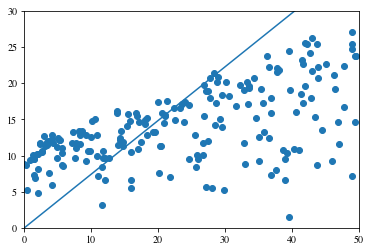

epoch:  1000 loss: 25.9534763777287
w, b:  0.36226181143284086 4.09059645918018


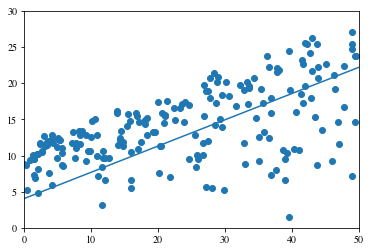

epoch:  2000 loss: 20.57459375662496
w, b:  0.2922720218247468 6.3778136487118635


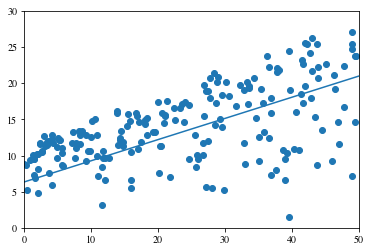

epoch:  3000 loss: 18.876170218021276
w, b:  0.2529431349721907 7.663054061034952


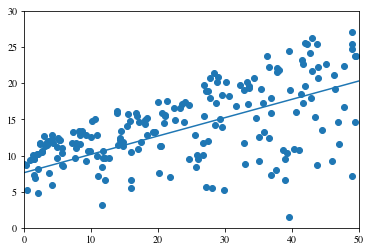

epoch:  4000 loss: 18.33987992881413
w, b:  0.23084332084612708 8.385260471964672


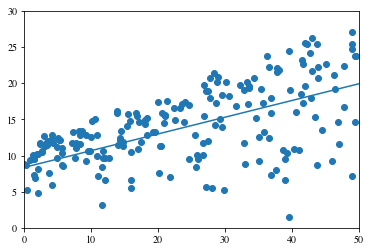

epoch:  5000 loss: 18.17054214718263
w, b:  0.218424922475546 8.791085012639682


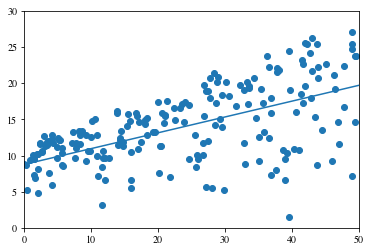

epoch:  6000 loss: 18.117072440822145
w, b:  0.21144673626951038 9.019127238963959


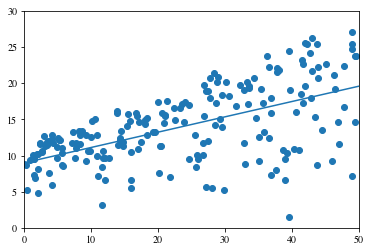

epoch:  7000 loss: 18.100188969982213
w, b:  0.20752553151564532 9.147269457520883


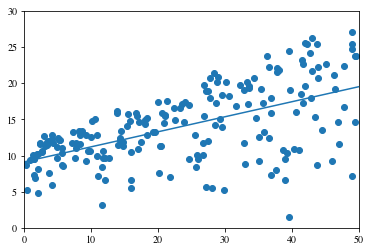

epoch:  8000 loss: 18.094857884270205
w, b:  0.2053221155752059 9.219275543592591


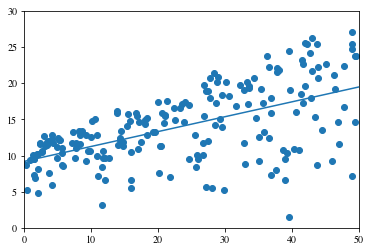

epoch:  9000 loss: 18.0931745529731
w, b:  0.20408396502930684 9.259737434215003


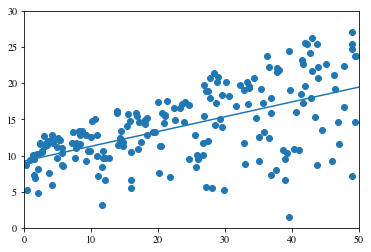

epoch:  10000 loss: 18.09264302817517
w, b:  0.20338821950701302 9.282473909450044


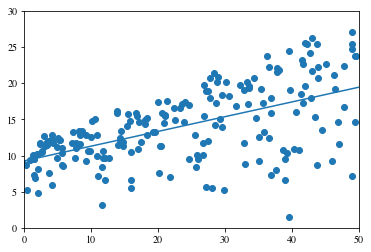

epoch:  11000 loss: 18.092475195134053
w, b:  0.20299726395367282 9.295250062471073


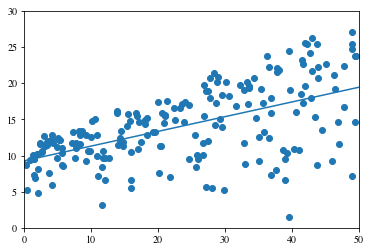

epoch:  12000 loss: 18.092422200561078
w, b:  0.20277757695635729 9.302429279316703


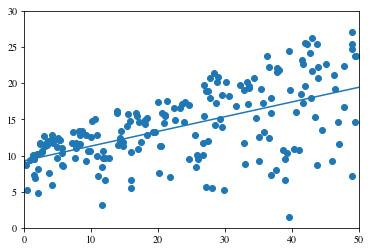

epoch:  13000 loss: 18.092405467117242
w, b:  0.20265412973485836 9.306463447851764


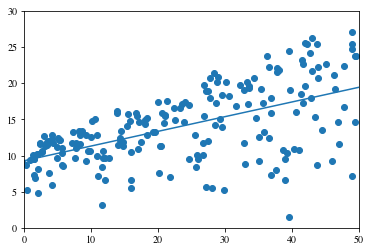

epoch:  14000 loss: 18.092400183403708
w, b:  0.20258476187657834 9.308730340762107


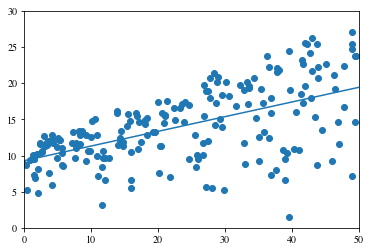

Wall time: 3min 52s


In [13]:
x = salesDF['Spending']
y = salesDF['Sales']

%time w_array, b_array = train(x, y, 0.0, 0.0, 0.001, 15000)


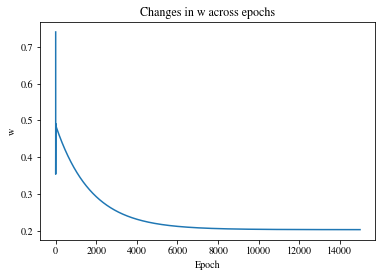

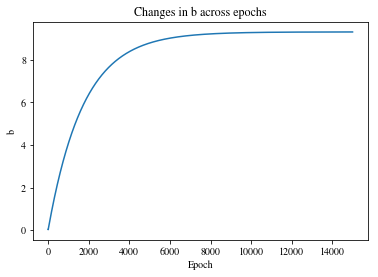

In [14]:
epochs = 15000

plt.plot(range(epochs), w_array)
plt.xlabel("Epoch")
plt.ylabel("w")
plt.title("Changes in w across epochs")
plt.show()

plt.plot(range(epochs), b_array)
plt.xlabel("Epoch")
plt.ylabel("b")
plt.title("Changes in b across epochs")
plt.show()

#### Gradient descent can be computationally expensive because in each epoch all training instances are used to update parameters. An alternative is to use only small portions of the training data in batches in each epoch for updating parameters. This is called <i>Stochastic Gradient Descent (SGD)</i> and has many variants depending on how the training instances are selected in each epoch. In the basic SGD approach, only one instance is used in each epoch (but, we may still need to make several passes through the data overall). 

In [15]:
def update_sgd_w_and_b(spendings, sales, w, b, alpha, i):
    dr_dw = 0.0
    dr_db = 0.0
    N = len(spendings)

    dr_dw += -2 * spendings[i] * (sales[i] - (w * spendings[i] + b))
    dr_db += -2 * (sales[i] - (w * spendings[i] + b))

    # update w and b
    w = w - dr_dw * alpha
    b = b - dr_db * alpha

    return w, b

In [16]:
def train_sgd(x, y, w, b, alpha, epochs):
    
    for e in range(epochs):
        
        i = e % len(x)
            
        w, b = update_sgd_w_and_b(x, y, w, b, alpha, i)

        # log the progress
        if e % 5000 == 0:
            print("epoch: ", str(e), "loss: "+str(loss(x, y, w, b)))
            print("w, b: ", w, b)
            print("\n")

    return w, b

In [17]:
x = salesDF['Spending']
y = salesDF['Sales']

# In SGD, we may need to use a much smaller learnng rate since it is applied many more times than in GD
# We also may need more epochs to compensate for not using all training instances in each epoch

%time w, b = train_sgd(x, y, 0.0, 0.0, 0.00005, 150000)

print("Final Values: w = ", w, "b = ", b)


epoch:  0 loss: 167.046659322843
w, b:  0.083538 0.00221


epoch:  5000 loss: 39.824359785949106
w, b:  0.5121956805071118 1.2727771128702745


epoch:  10000 loss: 35.1187092947999
w, b:  0.47889129400150465 2.3609517135912466


epoch:  15000 loss: 31.598403753804448
w, b:  0.4500759227090795 3.302453973225485


epoch:  20000 loss: 28.965127398855287
w, b:  0.42514450346253246 4.11705349090316


epoch:  25000 loss: 26.995605203909257
w, b:  0.4035735280501661 4.8218551707828246


epoch:  30000 loss: 25.522731432197915
w, b:  0.38491005062678096 5.431658389642229


epoch:  35000 loss: 24.421443370607143
w, b:  0.36876217678823636 5.959267753165333


epoch:  40000 loss: 23.598147170580525
w, b:  0.354790834599947 6.415761966163919


epoch:  45000 loss: 22.982802680976782
w, b:  0.3427026547879167 6.810726462452855


epoch:  50000 loss: 22.52299870585794
w, b:  0.3322438105910846 7.152454679124092


epoch:  55000 loss: 22.17951821320879
w, b:  0.32319468792459694 7.448122201563588


epoch